In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


In [5]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [6]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [7]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

Data Augmentation

In [8]:
batch_size = 100
IMG_SHAPE = 150

Apply Random Horizontal Flip

In [9]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size= batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE)
)

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

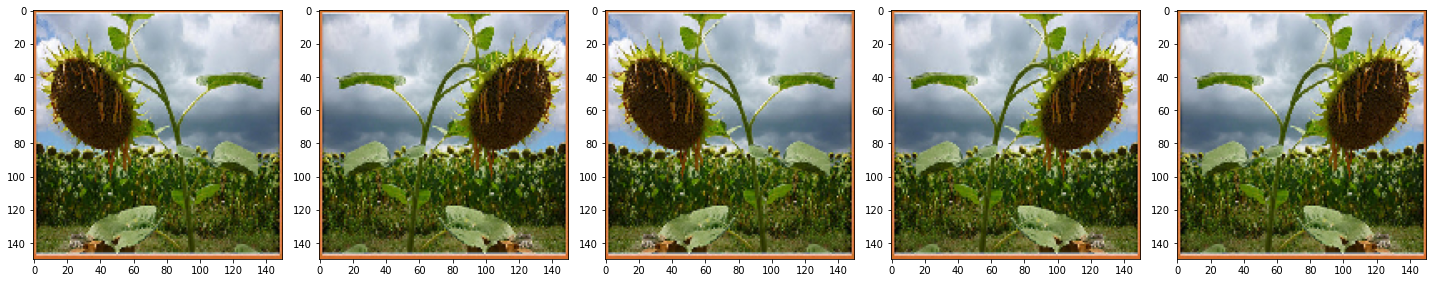

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Apply Random Rotation

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

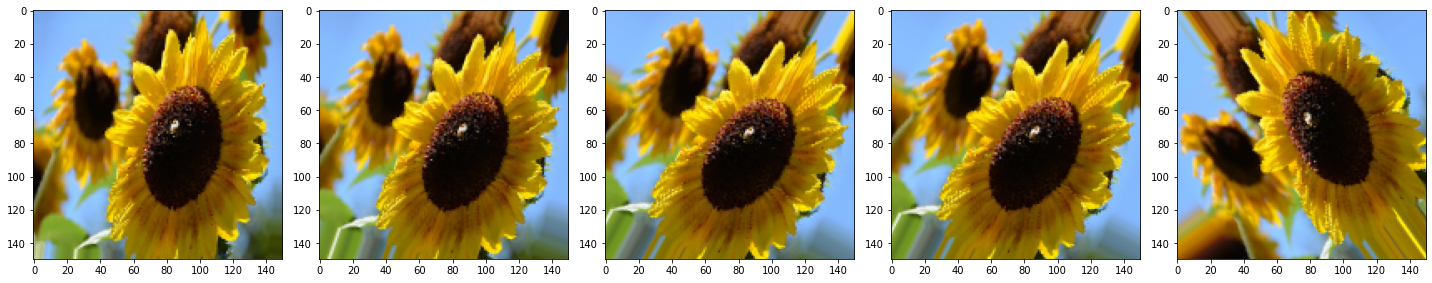

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Apply Random Zoom

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

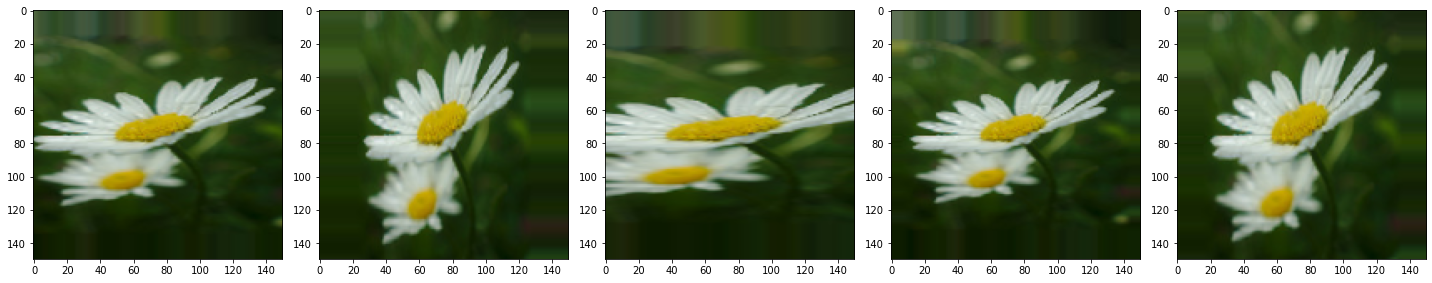

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Put It All Together

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:


random 45 degree rotation

random zoom of up to 50%

random horizontal flip

width shift of 0.15

height shift of 0.15

We can apply all these augmentations, and even others, with just one line of code, by passing the augmentations as arguments with proper values.

In [15]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      zoom_range=0.5,
      horizontal_flip=True,
      )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 2935 images belonging to 5 classes.


Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset.

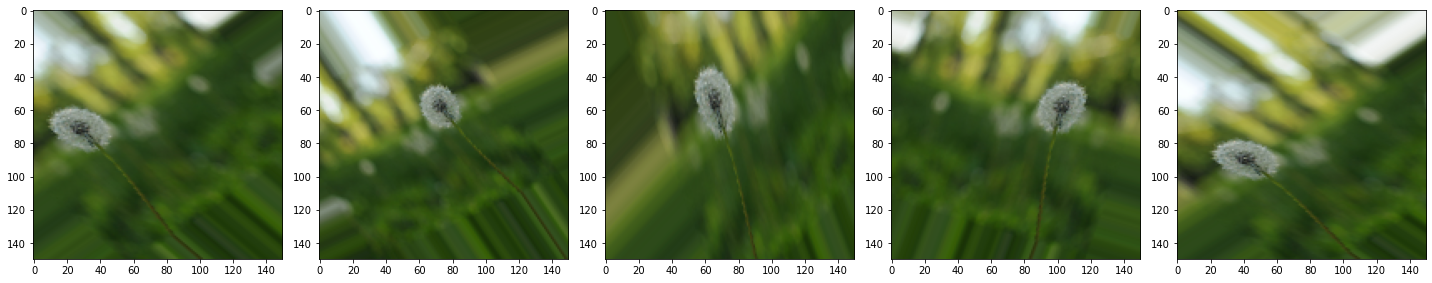

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Create a Data Generator for the Validation Set

In [17]:
image_gen_val =ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                               directory=val_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE),
                                               class_mode='sparse')

Found 735 images belonging to 5 classes.


Create the CNN

In [18]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(5, activation='softmax')
]
)

Compile the Model

In [22]:
model.compile(optimizer='ADAM',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Model Summary

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

Train the model

In the cell below, train your model using the fit_generator function instead of the usual fit function. We have to use the fit_generator function because we are using the ImageDataGenerator class to generate batches of training and validation data for our mode

In [24]:
epochs = 80
history =model.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
30/30 [==============================] - 24s 786ms/step - loss: 1.3346 - accuracy: 0.4433 - val_loss: 1.2701 - val_accuracy: 0.5075
Epoch 2/80
30/30 [==============================] - 23s 756ms/step - loss: 1.1082 - accuracy: 0.5421 - val_loss: 1.0482 - val_accuracy: 0.5864
Epoch 3/80
30/30 [==============================] - 24s 800ms/step - loss: 1.0354 - accuracy: 0.5809 - val_loss: 1.0183 - val_accuracy: 0.6122
Epoch 4/80
30/30 [==============================] - 23s 766ms/step - loss: 0.9843 - accuracy: 0.6034 - val_loss: 1.0029 - val_accuracy: 0.5973
Epoch 5/80
30/30 [==============================] - 23s 758ms/step - loss: 0.9047 - accuracy: 0.6412 - val_loss: 0.9173 - val_accuracy: 0.6395
Epoch 6/80
30/30 [==============================] - 24s 805ms/step - loss: 0.8834 - accuracy: 0.6514 - val_loss: 0.8640 - val_accuracy: 0.6639
Epoch 7/80
30/30 [==============================] - 23s 800ms/step - loss: 0.8563 - accuracy: 0.6675 - val_loss: 0.8930 - val_accuracy: 0.6476

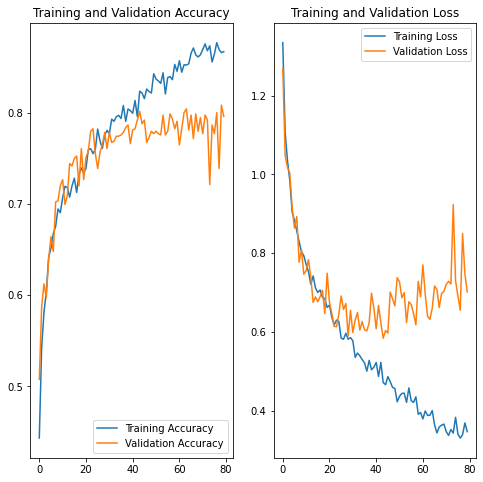

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()